1. Memasukkan libraries

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

2. Membaca data File

In [ ]:
file_path = ('/content/water_potability.csv')
water_data = pd.read_csv(file_path)

In [ ]:
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df=water_data.copy()

3. Lakukan analisis awal terhadap 10 kolom dari dataset, yang terdiri dari: Ph, Hardness, Solids,
Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, dan
Potabiliy. Tampilkan informasi dari dataset, seperti jumlah baris, tipe data tiap kolom, dan
nilai unik.

a. Menampilkan informasi dari dataset

In [ ]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


b . menampilkan jumlah baris

In [ ]:
print ("Jumlah baris : ",water_data.shape[0])

Jumlah baris :  3276


c. Menampilkan type data tiap kolom

In [ ]:
water_data.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


d. Menampilkan nilai unik

In [ ]:
water_data.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


 4. Cek missing values dan outlier di setiap kolom. Gunakan teknik imputasi rata-rata (mean) untuk mengganti nilai dari kondisi tersebut dan Visualisasi distribusi data kualitas air sebelum dan setelah melakukan resampling melalui bar plot.

a. Mengecek jumlah mising values

In [ ]:
water_data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


b. Menggunakan Z-Scores untuk outliner setiap kolom

In [ ]:
# Menghitung Z-Score
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Menentukan batas Z-Score (misalnya > 3 atau < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier berdasarkan Z-Score:")
print(outliers_zscore.sum())


Jumlah outlier berdasarkan Z-Score:
ph                  0
Hardness           18
Solids             20
Chloramines        20
Sulfate             0
Conductivity        7
Organic_carbon      4
Trihalomethanes     0
Turbidity           9
Potability          0
dtype: int64


c. Mengganti nilai yang kosong menggunakan teknik imputasi rata-rata

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Memeriksa apakah masih ada missing values setelah imputasi
missing_values_after = df.isnull().sum()
print("\nJumlah missing values setelah imputasi rata-rata:")
print(missing_values_after)


Jumlah missing values setelah imputasi rata-rata:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
# Memeriksa apakah masih ada missing values
if df.isnull().sum().sum() == 0:
    print("\nImputasi berhasil, tidak ada missing values yang tersisa.")
else:
    print("\nMasih ada missing values setelah imputasi.")


Imputasi berhasil, tidak ada missing values yang tersisa.


d. Meresampling data air lalu memvisualisasi data air setelah resampling menggunakan bar plot

5. Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat dengan menampilkan visualisasi korelasi heatmap dan distribusi atribut menggunakan histogram plot.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


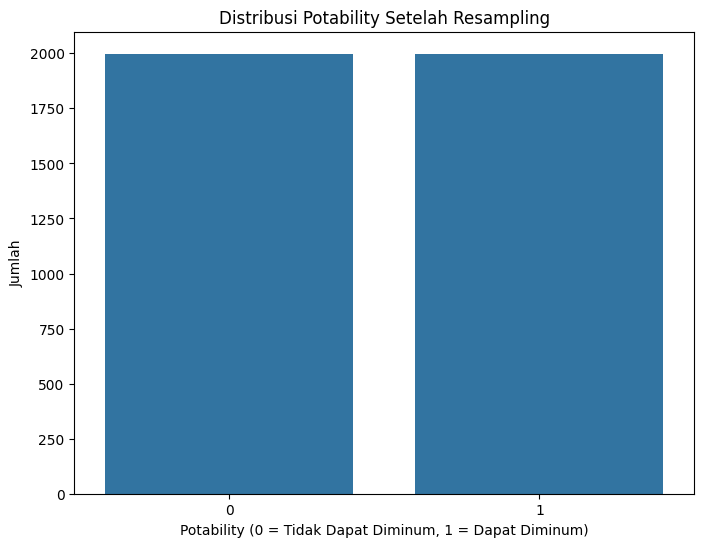

In [ ]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur (X) dan target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menyusun ulang DataFrame setelah resampling
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Potability'] = y_resampled

# Visualisasi distribusi 'Potability' setelah resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df_resampled)
plt.title('Distribusi Potability Setelah Resampling')
plt.xlabel('Potability (0 = Tidak Dapat Diminum, 1 = Dapat Diminum)')
plt.ylabel('Jumlah')
plt.show()


e. Memvisualisasikan data air sebelum dan sesudah resampling menggunakan bar plot

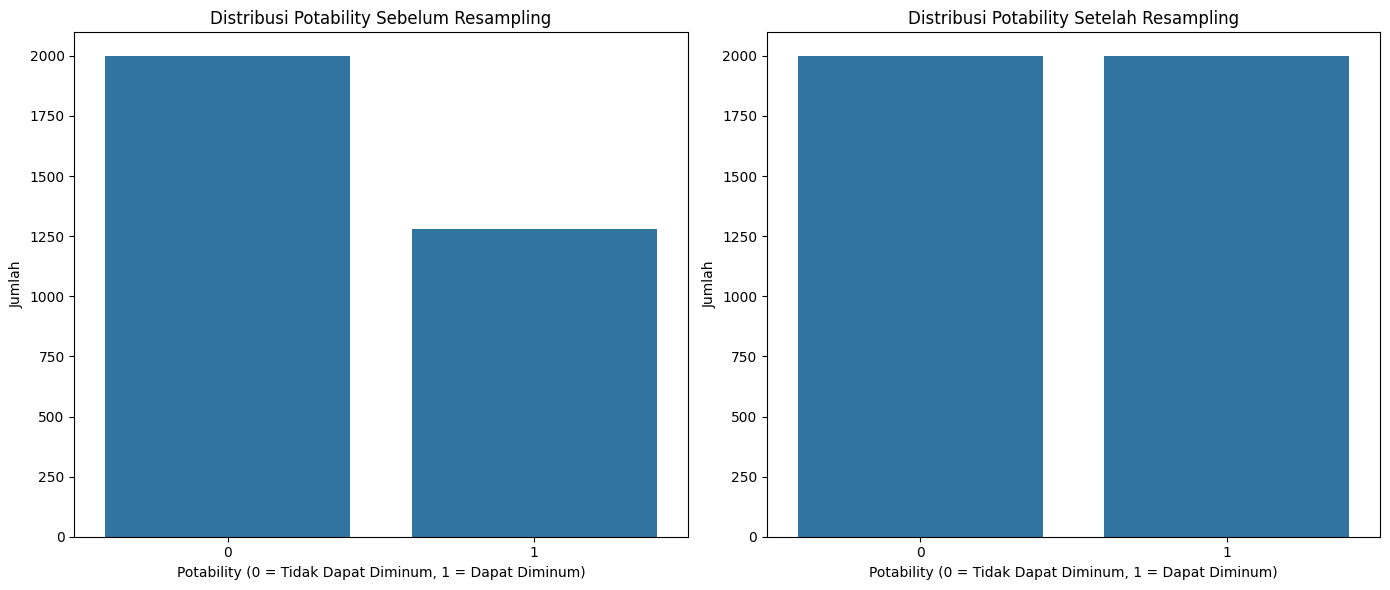

In [ ]:
# Membuat plot untuk membandingkan distribusi sebelum dan setelah resampling
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sebelum resampling
sns.countplot(x='Potability', data=df, ax=axes[0])
axes[0].set_title('Distribusi Potability Sebelum Resampling')
axes[0].set_xlabel('Potability (0 = Tidak Dapat Diminum, 1 = Dapat Diminum)')
axes[0].set_ylabel('Jumlah')

# Setelah resampling
sns.countplot(x='Potability', data=df_resampled, ax=axes[1])
axes[1].set_title('Distribusi Potability Setelah Resampling')
axes[1].set_xlabel('Potability (0 = Tidak Dapat Diminum, 1 = Dapat Diminum)')
axes[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()


5. Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat dengan menampilkan visualisasi korelasi heatmap dan distribusi atribut menggunakan histogram plot.

a. Memvisualisasi korelasi heatmap dan menghitung korelasi antar kolom numerik

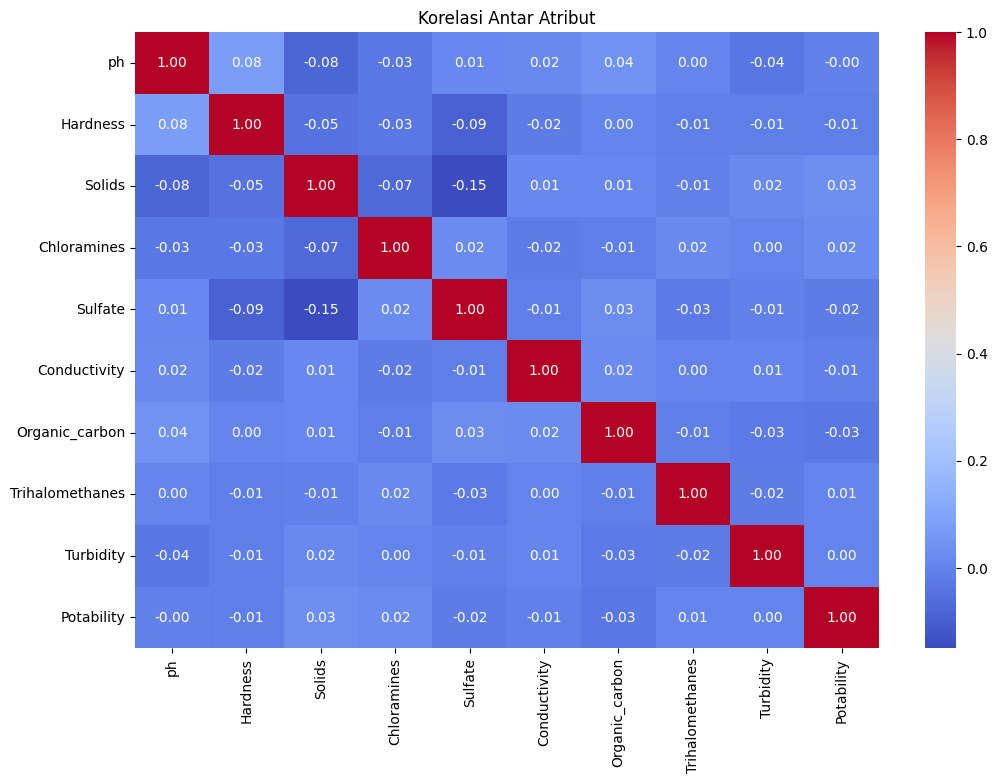

In [ ]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = df.corr()

# Membuat heatmap untuk visualisasi korelasi antar atribut
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Korelasi Antar Atribut')
plt.show()


b Mendistribusikan atribut menggunakan histogram

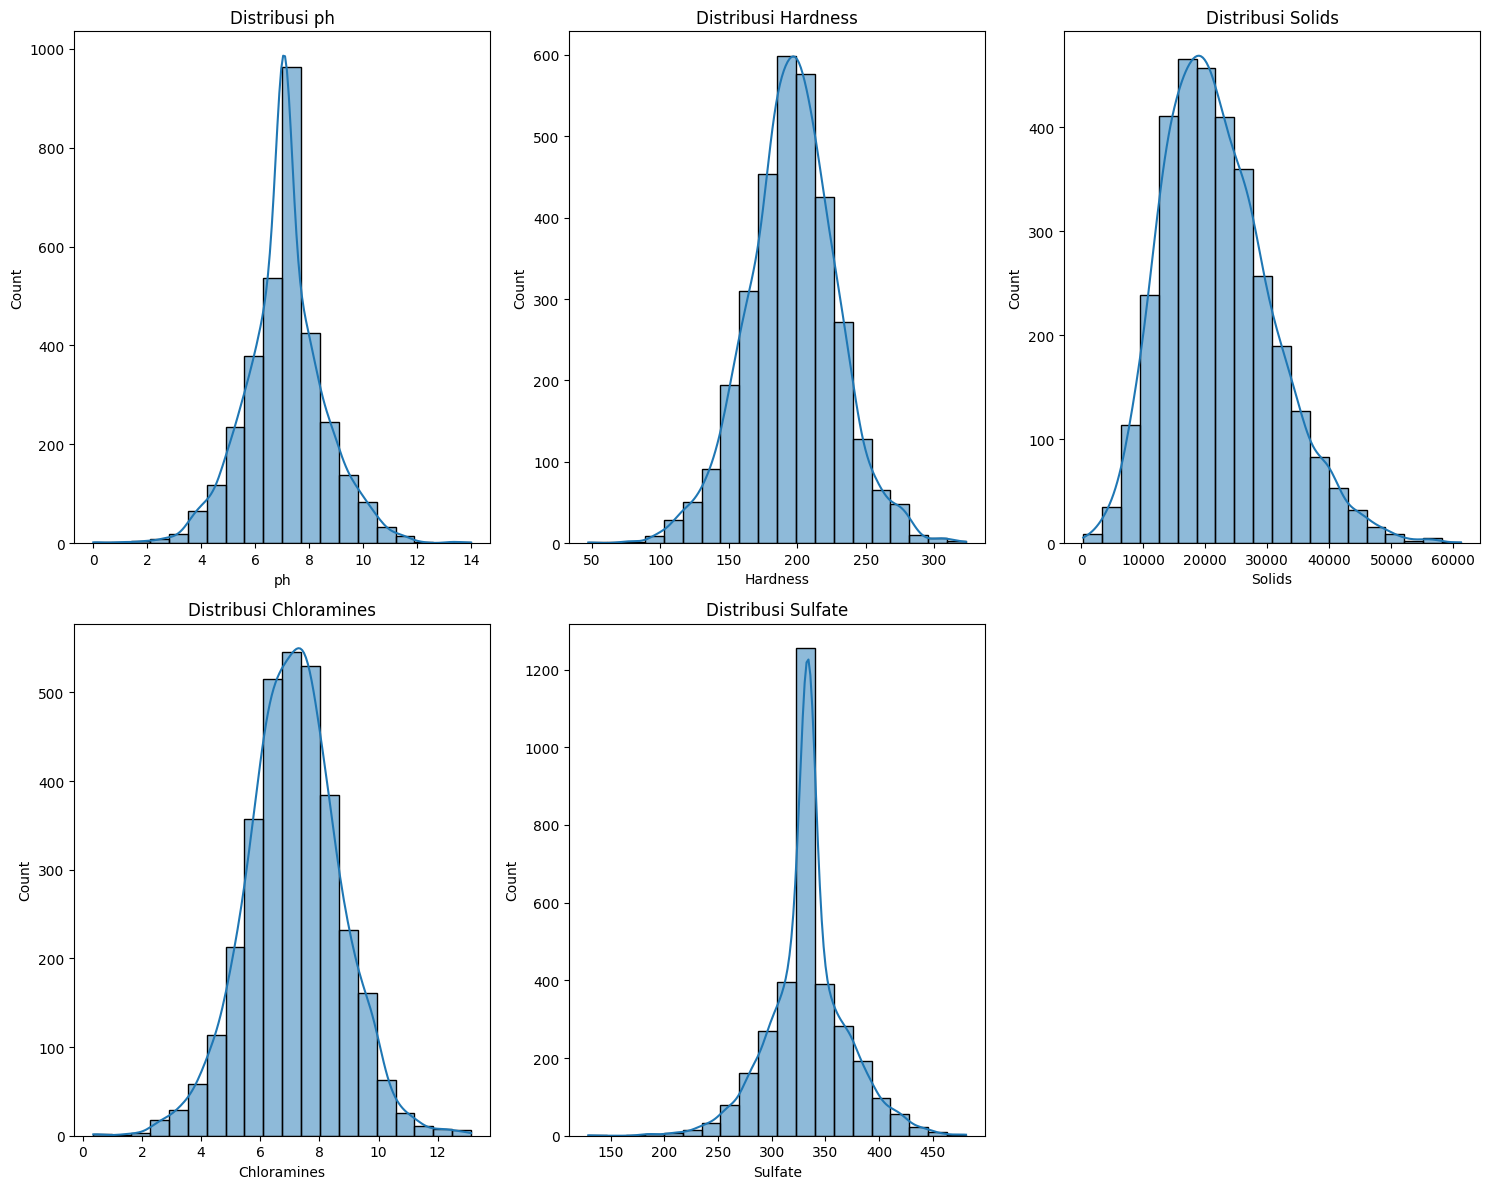

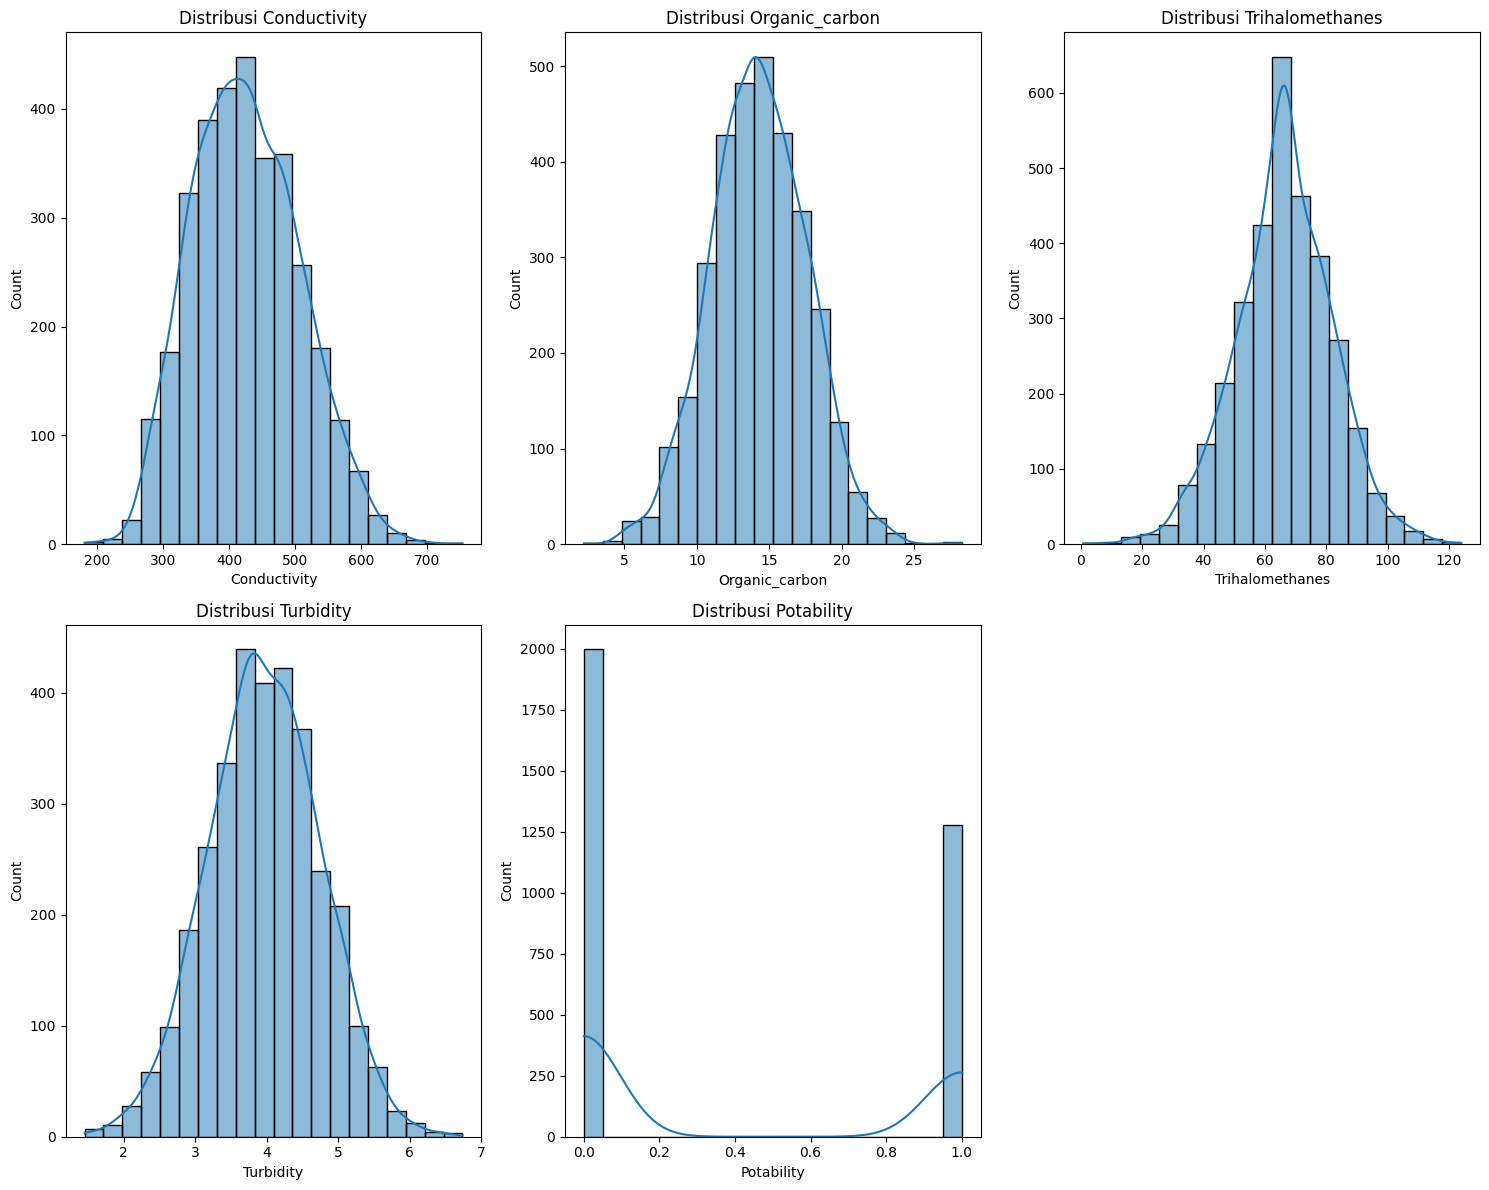

In [ ]:
# Membagi menjadi dua bagian
set_1 = numerical_columns[:5]
set_2 = numerical_columns[5:]

# Set 1
plt.figure(figsize=(15, 12))
for i, col in enumerate(set_1, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

# Set 2
plt.figure(figsize=(15, 12))
for i, col in enumerate(set_2, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()


6. Project wajib menggunakan minimal 3 algoritma klasifikasi yang kemudian dikomparasi hasil akurasinya satu sama lain.

a. Membuat train dan testnya

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

b. Membuat klasifikasi menggunakan gausian

In [ ]:
# Membuat model Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

print(f"Akurasi Gaussian Naive Bayes: {accuracy_gnb:.4f}")
print("Confusion Matrix Gaussian Naive Bayes:")
print(conf_matrix_gnb)

Akurasi Gaussian Naive Bayes: 0.6331
Confusion Matrix Gaussian Naive Bayes:
[[710 118]
 [363 120]]


c. membuat klasifikasi decision tree

In [ ]:
# Membuat model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Akurasi Decision Tree: {accuracy_dt:.4f}")
print("Confusion Matrix Decision Tree:")
print(conf_matrix_dt)


Akurasi Decision Tree: 0.5789
Confusion Matrix Decision Tree:
[[535 293]
 [259 224]]


d. membuat klasifikasi KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Akurasi K-Nearest Neighbors: {accuracy_knn:.4f}")
print("Confusion Matrix K-Nearest Neighbors:")
print(conf_matrix_knn)

Akurasi K-Nearest Neighbors: 0.5454
Confusion Matrix K-Nearest Neighbors:
[[563 265]
 [331 152]]


e. Menampilkan confusion matrix untuk membandingkan hasil dari ketiga klasifikasi

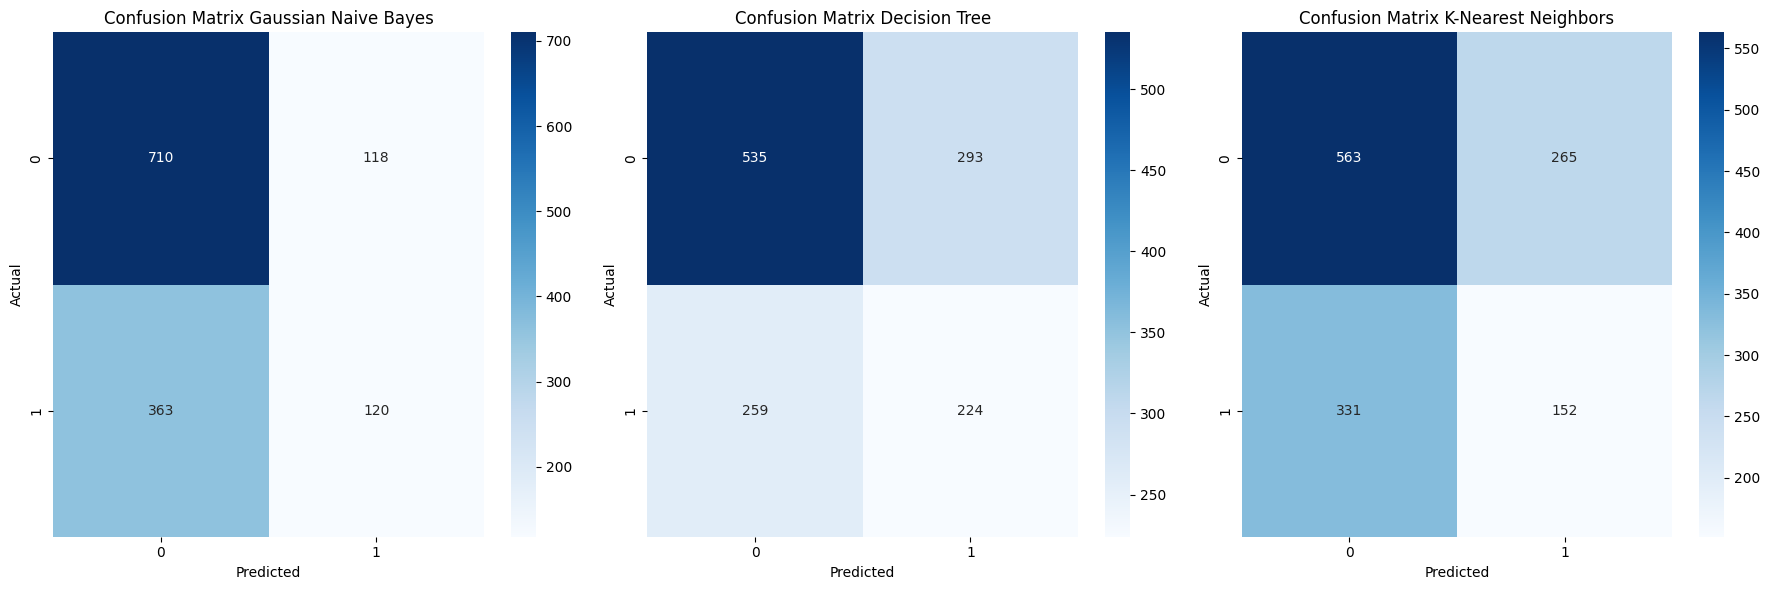

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix Gaussian Naive Bayes')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix K-Nearest Neighbors')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


f. Melihat perbedaaan setiap klasifikasi sebelum dan sesudah di normalisasi

In [ ]:
# Misalnya, X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Tanpa normalisasi (Model asli)
# Inisialisasi model
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Latih dan evaluasi model tanpa normalisasi
gnb.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Prediksi dan hitung akurasi
gnb_acc = accuracy_score(y_test, gnb.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Akurasi GaussianNB tanpa normalisasi: {gnb_acc:.4f}")
print(f"Akurasi Decision Tree tanpa normalisasi: {dt_acc:.4f}")
print(f"Akurasi KNN tanpa normalisasi: {knn_acc:.4f}")
print("")

# Dengan normalisasi (menggunakan StandardScaler)
scaler = StandardScaler()

# Terapkan normalisasi pada data latih dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih dan evaluasi model dengan normalisasi
gnb.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# Prediksi dan hitung akurasi setelah normalisasi
gnb_scaled_acc = accuracy_score(y_test, gnb.predict(X_test_scaled))
dt_scaled_acc = accuracy_score(y_test, dt.predict(X_test_scaled))
knn_scaled_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

print(f"Akurasi GaussianNB setelah di normalisasi: {gnb_scaled_acc:.4f}")
print(f"Akurasi Decision Tree setelah di normalisasi: {dt_scaled_acc:.4f}")
print(f"Akurasi KNN setelah di normalisasi: {knn_scaled_acc:.4f}")

Akurasi GaussianNB tanpa normalisasi: 0.6369
Akurasi Decision Tree tanpa normalisasi: 0.5805
Akurasi KNN tanpa normalisasi: 0.5492

Akurasi GaussianNB setelah di normalisasi: 0.6362
Akurasi Decision Tree setelah di normalisasi: 0.5805
Akurasi KNN setelah di normalisasi: 0.6354


1. Tingkat Akurasi Setiap Algoritma:

- GaussianNB (Naive Bayes Gaussian)<br>
Tanpa normalisasi: 0.6369<br>
Setelah normalisasi: 0.6362<br>
Kesimpulan: Akurasi GaussianNB relatif stabil baik dengan normalisasi maupun tanpa normalisasi, dengan sedikit penurunan setelah normalisasi.

- Decision Tree<br>
Tanpa normalisasi: 0.5805<br>
Setelah normalisasi: 0.5805<br>
Kesimpulan: Akurasi Decision Tree tidak terpengaruh oleh normalisasi, dan tetap sama di kedua kondisi (tanpa dan dengan normalisasi).

- KNN (K-Nearest Neighbors)<br>
Tanpa normalisasi: 0.5492<br>
Setelah normalisasi: 0.6354<br>
Kesimpulan: Akurasi KNN meningkat secara signifikan setelah normalisasi, menunjukkan bahwa normalisasi mempengaruhi kinerja algoritma ini.

2. Keunggulan dan Keterbatasan Algoritma:

- GaussianNB (Naive Bayes Gaussian)<br>
Keunggulan:<br>
Algoritma ini cepat dan efisien, terutama dengan data besar.<br>
Stabilitas akurasi meskipun tanpa normalisasi.<br>
Cocok untuk data yang memiliki distribusi normal atau mendekati normal.<br>
Keterbatasan:<br>
Kinerjanya dapat menurun jika data tidak terdistribusi normal.<br>
Terkadang tidak terlalu akurat dengan data yang sangat kompleks atau memiliki banyak fitur korelasi.<br>

- Decision Tree<br>
Keunggulan :<br>
Mudah dipahami dan diinterpretasikan, karena menghasilkan model dalam bentuk pohon keputusan yang jelas.<br>
Tidak memerlukan normalisasi data.<br>
Dapat menangani data kategori dan numerik.<br>
Keterbatasan:<br>
Cenderung overfitting pada data yang sangat bervariasi atau noise.<br>
Rentan terhadap fluktuasi kecil dalam data pelatihan.<br>

- KNN (K-Nearest Neighbors)<br>
Keunggulan :<br>
Sederhana dan mudah diimplementasikan.<br>
Tidak ada fase pelatihan, sehingga dapat langsung digunakan dengan data baru.
Berkinerja baik pada dataset yang tidak memiliki banyak fitur.<br>
Keterbatasan:<br>
Sensitif terhadap skala fitur, yang membuat normalisasi sangat penting.<br>
Memerlukan lebih banyak waktu untuk prediksi pada dataset besar karena berbasis pada pencarian tetangga terdekat.<br>
Kinerja dapat menurun dengan jumlah data yang sangat besar atau fitur yang terlalu banyak.<br>

3. Rekomendasi Algoritma yang Paling Efektif:<br>
Berdasarkan hasil analisis di atas, GaussianNB adalah algoritma yang paling efektif untuk kasus ini, meskipun hasilnya sedikit menurun setelah normalisasi.

- Alasan mengapa GaussianNB optimal:<br>
Stabilitas Akurasi: GaussianNB memiliki akurasi yang stabil dan tinggi (0.6369) meskipun tanpa normalisasi, yang menunjukkan bahwa algoritma ini cukup tahan terhadap data yang tidak terstandarisasi.
Kecepatan dan Efisiensi: Algoritma ini cepat dalam proses pelatihan dan prediksi, yang sangat menguntungkan jika volume data besar.
Sesuai untuk Distribusi Normal: Meskipun normalisasi sedikit menurunkan akurasi, GaussianNB masih menunjukkan hasil yang baik dalam hal kecepatan dan kinerja.